In [2]:
import os

#importing libraries
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('./Raw/train.csv', parse_dates=['date'])
display(df)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [6]:
df.groupby(["store", "item"]).agg({"sales": ["sum", "mean", "median", "std"]})

sales                             
               sum       mean median        std
store item                                     
1     1      36468  19.971522   19.0   6.741022
      2      97050  53.148959   52.0  15.005779
      3      60638  33.208105   33.0  10.072529
      4      36440  19.956188   20.0   6.640618
      5      30335  16.612815   16.0   5.672102
...            ...        ...    ...        ...
10    46    120601  66.046550   65.0  18.114991
      47     45204  24.755750   24.0   7.924820
      48    105570  57.814896   57.0  15.898538
      49     60317  33.032311   32.0  10.091610
      50    135192  74.037240   73.0  19.937566

[500 rows x 4 columns]

<h1>Manual Feature Generation 

In [4]:
def create_date_features(df,date_column):
    df['month'] = df[date_column].dt.month
    df['day_of_month'] = df[date_column].dt.day
    df['day_of_year'] = df[date_column].dt.dayofyear
    df['week_of_year'] = df[date_column].dt.isocalendar().week
    df['day_of_week'] = df[date_column].dt.dayofweek
    df['year'] = df[date_column].dt.year
    df["is_wknd"] = df[date_column].dt.weekday // 4
    df['is_month_start'] = df[date_column].dt.is_month_start.astype(int)
    df['is_month_end'] = df[date_column].dt.is_month_end.astype(int)
    df['quarter'] = df[date_column].dt.quarter
    df['is_quarter_start'] = df[date_column].dt.is_quarter_start.astype(int)
    df['is_quarter_end'] = df[date_column].dt.is_quarter_end.astype(int)
    df['is_year_start'] = df[date_column].dt.is_year_start.astype(int)
    df['is_year_end'] = df[date_column].dt.is_year_end.astype(int)
    return df

In [5]:
df = create_date_features(df,"date")
df

,date,store,item,sales,month,day_of_month,day_of_year,week_of_year,day_of_week,year,is_wknd,is_month_start,is_month_end,quarter,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,2013-01-01,1,1,13,1,1,1,1,1,2013,0,1,0,1,1,0,1,0
1,2013-01-02,1,1,11,1,2,2,1,2,2013,0,0,0,1,0,0,0,0
2,2013-01-03,1,1,14,1,3,3,1,3,2013,0,0,0,1,0,0,0,0
3,2013-01-04,1,1,13,1,4,4,1,4,2013,1,0,0,1,0,0,0,0
4,2013-01-05,1,1,10,1,5,5,1,5,2013,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,2017-12-27,10,50,63,12,27,361,52,2,2017,0,0,0,4,0,0,0,0
912996,2017-12-28,10,50,59,12,28,362,52,3,2017,0,0,0,4,0,0,0,0
912997,2017-12-29,10,50,74,12,29,363,52,4,2017,1,0,0,4,0,0,0,0
912998,2017-12-30,10,50,62,12,30,364,52,5,2017,1,0,0,4,0,0,0,0


In [7]:
df.describe()

,store,item,sales,month,day_of_month,day_of_year,week_of_year,day_of_week,year,is_wknd,is_month_start,is_month_end,quarter,is_quarter_start,is_quarter_end,is_year_start,is_year_end
count,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287,6.523549,15.727820,183.100219,26.615553,3.001643,2015.000548,0.428806,0.032859,0.032859,2.508762,0.010953,0.010953,0.002738,0.002738
std,2.872283,14.430878,28.801144,3.448535,8.799329,105.424201,15.060967,1.999316,1.414021,0.494906,0.178267,0.178267,1.117020,0.104081,0.104081,0.052256,0.052256
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2013.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,13.000000,30.000000,4.000000,8.000000,92.000000,14.000000,1.000000,2014.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,5.500000,25.500000,47.000000,7.000000,16.000000,183.000000,27.000000,3.000000,2015.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,38.000000,70.000000,10.000000,23.000000,274.000000,40.000000,5.000000,2016.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,50.000000,231.000000,12.000000,31.000000,366.000000,53.000000,6.000000,2017.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000


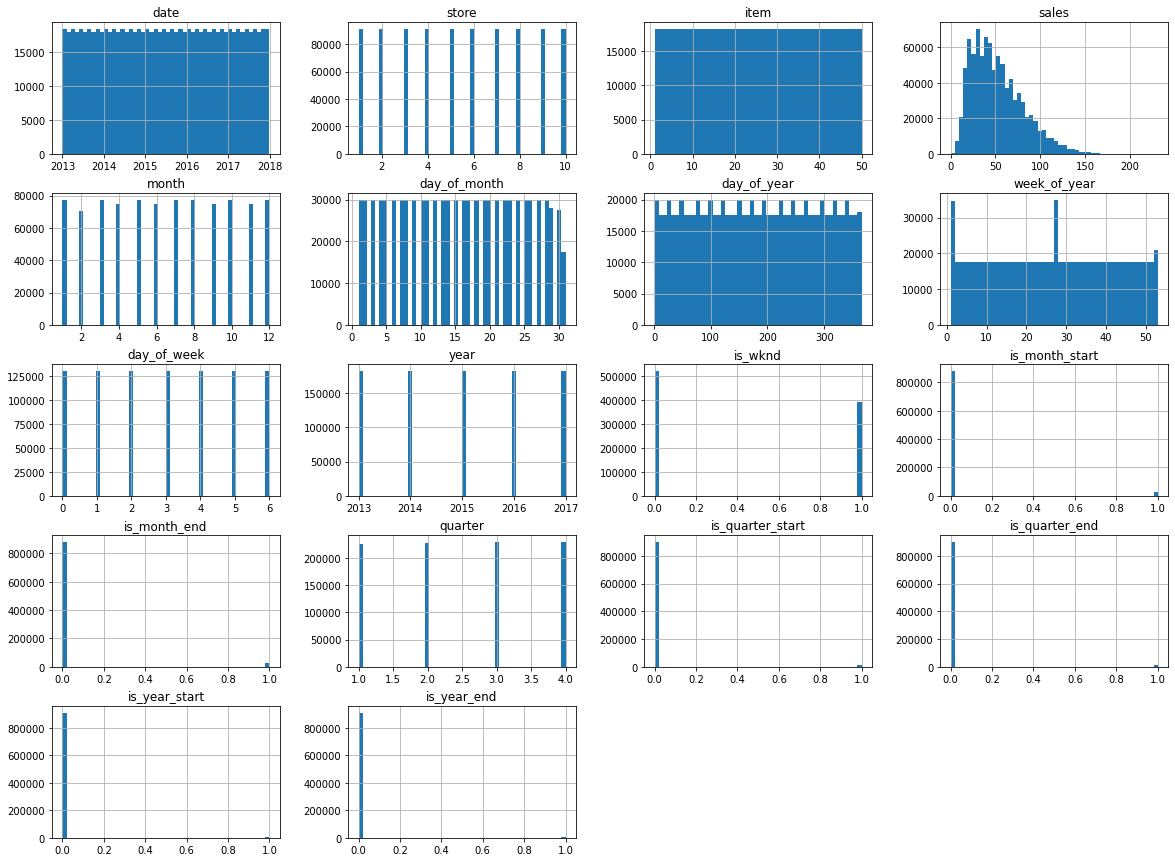

In [8]:
df.hist(bins=50,figsize=(20,15))
plt.show()

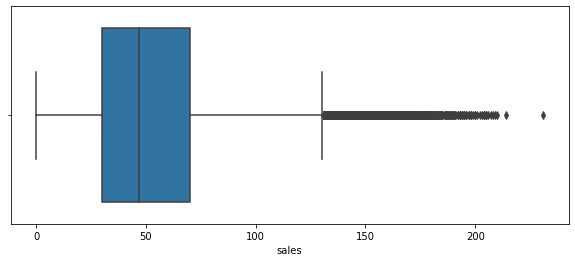

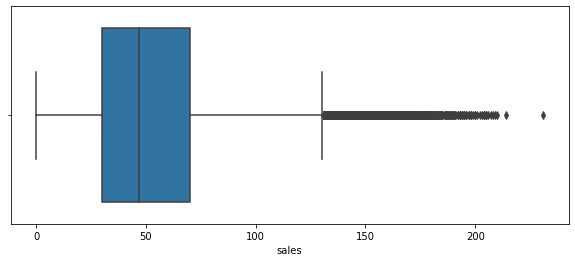

In [9]:
# Outlier detection
plt.figure(figsize=(10,4))
sns.boxplot(x=df['sales'])
plt.show()

# Outlier detection
plt.figure(figsize=(10,4))
sns.boxplot(x=df['sales'])
plt.show()

In [10]:
df.to_csv('./Data/1_out.csv') 

LightGBM
https://www.kaggle.com/code/satyads/auto-regressor-lightgbm-sktime

Temporal transfusion transformer
https://www.kaggle.com/code/shreyasajal/pytorch-forecasting-for-time-series-forecasting